### Importing several necessary libraries

In [1]:
# import mathematical and statistical libraries
import pandas as pd
import numpy as np
import scipy as sp

# import necessary plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import necessary data pre-processing
import sklearn
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

### Read the dataset

In [2]:
data = pd.read_csv("C:/Users/qalha/(2) PhD Program/Dataset/heart.csv")
df = data.copy()

#### Reading the data

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [9]:
df.duplicated().value_counts()

False    918
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'RestingBP'),
  Text(2.5, 0, 'Cholesterol'),
  Text(3.5, 0, 'FastingBS'),
  Text(4.5, 0, 'MaxHR'),
  Text(5.5, 0, 'Oldpeak'),
  Text(6.5, 0, 'HeartDisease')])

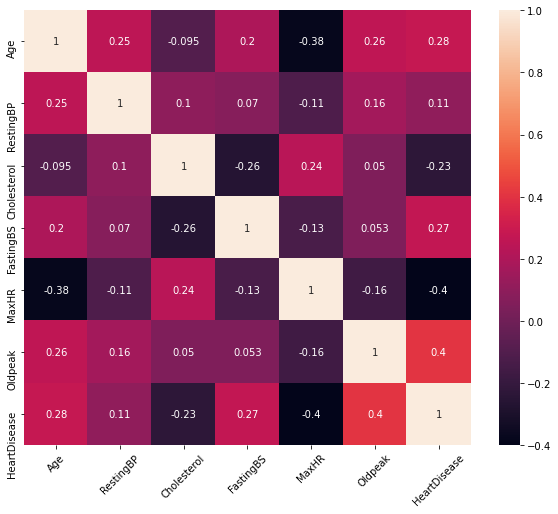

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)

### Train and test data

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.shape

(918, 16)

In [16]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [17]:
## For this study, only blood pressure, cholesterol, and maximum heart rate are used as a data
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

### Creating a model using Machine Learning Algorithms

#### Decision Tree Algorithm

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of the Decision Tree is: %.2f' %metrics.accuracy_score(prediction, y_test))
print("Metrics:\n", metrics.classification_report(y_true = y_test, y_pred = prediction))

The accuracy of the Decision Tree is: 0.75
Metrics:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71        82
           1       0.76      0.79      0.78       102

    accuracy                           0.75       184
   macro avg       0.75      0.74      0.75       184
weighted avg       0.75      0.75      0.75       184



In [34]:
model_validation = DecisionTreeClassifier(max_depth=None, random_state=42)

model_validation_scores = model_selection.cross_validate(model_validation, x_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv=10)
model_validation_scores = pd.DataFrame(model_validation_scores, index = range(1,11))
model_validation_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.008082,0.000896,0.756757,0.767442,0.804878,0.785714
2,0.008087,0.007993,0.756757,0.755556,0.829268,0.790698
3,0.008038,0.000000,0.783784,0.804878,0.804878,0.804878
4,0.008072,0.000000,0.756757,0.780488,0.780488,0.780488
5,0.000000,0.007890,0.698630,0.743590,0.707317,0.725000
6,0.010762,0.000000,0.767123,0.785714,0.804878,0.795181
7,0.000000,0.008076,0.698630,0.725000,0.725000,0.725000
8,0.000000,0.000000,0.712329,0.731707,0.750000,0.740741
9,0.000000,0.000000,0.780822,0.785714,0.825000,0.804878
10,0.007994,0.000000,0.753425,0.823529,0.700000,0.756757


In [35]:
model_validation_scores.mean()[2:]

test_accuracy     0.746501
test_precision    0.770362
test_recall       0.773171
test_f1           0.770933
dtype: float64

#### Random Forest Algorithm

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(class_weight='balanced', random_state=42)
RF_model.fit(x_train, y_train)
prediction = RF_model.predict(x_test)
print('The accuracy of the Random Forest is: %.2f' %metrics.accuracy_score(prediction, y_test))
print("Metrics:\n", metrics.classification_report(y_true = y_test, y_pred = prediction))

The accuracy of the Random Forest is: 0.88
Metrics:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [37]:
model_validation = RandomForestClassifier(max_depth=None, random_state=42)

model_validation_scores = model_selection.cross_validate(model_validation, x_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv=10)
model_validation_scores = pd.DataFrame(model_validation_scores, index = range(1,11))

model_validation_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.116418,0.011389,0.864865,0.860465,0.902439,0.880952
2,0.103341,0.010074,0.878378,0.847826,0.951220,0.896552
3,0.092328,0.018329,0.864865,0.878049,0.878049,0.878049
4,0.097676,0.010425,0.851351,0.857143,0.878049,0.867470
5,0.108722,0.010288,0.849315,0.875000,0.853659,0.864198
6,0.102778,0.010337,0.808219,0.813953,0.853659,0.833333
7,0.104362,0.007915,0.904110,0.883721,0.950000,0.915663
8,0.100636,0.007846,0.849315,0.853659,0.875000,0.864198
9,0.101336,0.008266,0.890411,0.847826,0.975000,0.906977
10,0.095327,0.006898,0.890411,0.880952,0.925000,0.902439


In [38]:
model_validation_scores.mean()[2:]

test_accuracy     0.865124
test_precision    0.859859
test_recall       0.904207
test_f1           0.880983
dtype: float64

### Implement scaling method to the x train and test data

In [39]:
scaler = preprocessing.MinMaxScaler()

In [40]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#### Decision Tree with scaled training

In [41]:
model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
model.fit(x_train_scaled, y_train)
prediction = model.predict(x_test_scaled)
print('The accuracy of the Decision Tree is: %.2f' %metrics.accuracy_score(prediction, y_test))
print("Metrics:\n", metrics.classification_report(y_true = y_test, y_pred = prediction))

The accuracy of the Decision Tree is: 0.67
Metrics:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62        82
           1       0.70      0.73      0.71       102

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.67      0.67      0.67       184



#### Random Forest with scaled training

In [42]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=42)
RF_model.fit(x_train_scaled, y_train)
prediction = RF_model.predict(x_test_scaled)
print('The accuracy of the Random Forest is: %.2f' %metrics.accuracy_score(prediction, y_test))
print("Metrics:\n", metrics.classification_report(y_true = y_test, y_pred = prediction))

The accuracy of the Random Forest is: 0.82
Metrics:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        82
           1       0.78      0.92      0.85       102

    accuracy                           0.82       184
   macro avg       0.83      0.80      0.81       184
weighted avg       0.82      0.82      0.81       184



### Visualization the Decision Tree and Random Forest tree

#### Visualization using plot tree

In [ ]:
"""from sklearn.tree import plot_tree
features = list(X.columns)
targets = str(df.HeartDisease.unique())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=150)
plot_tree(RF_model.estimators_[0],
         feature_names = features,
         class_names = targets,
         filled = True)"""

In [ ]:
"""from sklearn.tree import plot_tree
features = list(X.columns)
targets = str(df.HeartDisease.unique())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=150)
plot_tree(model,
         feature_names = features,
         class_names = targets,
         filled = True)"""

#### Visualization using graphviz

In [ ]:
"""from sklearn.tree import export_graphviz
import pydot

export_graphviz(model, out_file='tree_ds.dot', class_names=targets,
              feature_names=features, impurity=False, filled=True)

graphs = pydot.graph_from_dot_file("tree_ds.dot")
graph = graphs[0]
graph.write_png("output_DS.png")"""

In [ ]:
"""from sklearn.tree import export_graphviz
import pydot

export_graphviz(RF_model.estimators_[0], out_file='tree_rf.dot', class_names=targets,
              feature_names=features, impurity=False, filled=True)

graphs = pydot.graph_from_dot_file("tree_rf.dot")
graph = graphs[0]
graph.write_png("output_RF.png")"""